# Método del gradiente
## Cambio del error al aproximarse al valor correcto

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
habitaciones = [1.0, 2.0, 3.0, 4.0]
precios = [6.0, 12.0, 18.0, 24.0]

In [0]:
def prediccion(habitaciones,omega):
   return habitaciones * omega

In [0]:
def loss(habitaciones, precio_real,omega):
   prediccion_precio = prediccion(habitaciones,omega)
   return (prediccion_precio - precio_real) ** 2

In [5]:

omega_list = []
mse_list = []
for omega in np.arange(3.0, 9.1, 1):
   print("omega=", omega)
   print("\t Hab Pre_real Pre_pred Err_cua")
   err_sum = 0
   for habitaciones_val, precios_val in zip(habitaciones, precios):
       precio_pred_val = prediccion(habitaciones_val, omega)
       err_cuad = loss(habitaciones_val, precios_val,omega)
       err_sum += err_cuad
       print("\t", habitaciones_val, precios_val, precio_pred_val, err_cuad)
   print("MSE=", err_sum / len(habitaciones))
   omega_list.append(omega)
   mse_list.append(err_sum / len(habitaciones))



omega= 3.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 3.0 9.0
	 2.0 12.0 6.0 36.0
	 3.0 18.0 9.0 81.0
	 4.0 24.0 12.0 144.0
MSE= 67.5
omega= 4.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 4.0 4.0
	 2.0 12.0 8.0 16.0
	 3.0 18.0 12.0 36.0
	 4.0 24.0 16.0 64.0
MSE= 30.0
omega= 5.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 5.0 1.0
	 2.0 12.0 10.0 4.0
	 3.0 18.0 15.0 9.0
	 4.0 24.0 20.0 16.0
MSE= 7.5
omega= 6.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 6.0 0.0
	 2.0 12.0 12.0 0.0
	 3.0 18.0 18.0 0.0
	 4.0 24.0 24.0 0.0
MSE= 0.0
omega= 7.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 7.0 1.0
	 2.0 12.0 14.0 4.0
	 3.0 18.0 21.0 9.0
	 4.0 24.0 28.0 16.0
MSE= 7.5
omega= 8.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 8.0 4.0
	 2.0 12.0 16.0 16.0
	 3.0 18.0 24.0 36.0
	 4.0 24.0 32.0 64.0
MSE= 30.0
omega= 9.0
	 Hab Pre_real Pre_pred Err_cua
	 1.0 6.0 9.0 9.0
	 2.0 12.0 18.0 36.0
	 3.0 18.0 27.0 81.0
	 4.0 24.0 36.0 144.0
MSE= 67.5


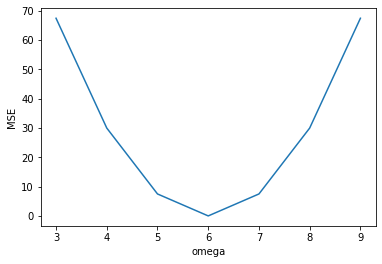

In [6]:
plt.plot(omega_list, mse_list)
plt.ylabel('MSE')
plt.xlabel('omega')
plt.show()


## Metodo del gradiente

For the fitting line: y = 8x 
SSE: 1313400.00
Starting line: y = 8.00x - Error: 1313400.00
At step 1 - Line: y = 4.020x  - Error: 1287263.34
At step 101 - Line: y = 5.275x  - Error: 172467.12
At step 201 - Line: y = 5.735x  - Error: 23107.09
At step 301 - Line: y = 5.903x  - Error: 3095.88
At step 401 - Line: y = 5.964x  - Error: 414.79
At step 501 - Line: y = 5.987x  - Error: 55.57
At step 601 - Line: y = 5.995x  - Error: 7.45
At step 701 - Line: y = 5.998x  - Error: 1.00
At step 801 - Line: y = 5.999x  - Error: 0.13
At step 901 - Line: y = 6.000x  - Error: 0.02

Best line: y = 6.00x  - Error: 0.00


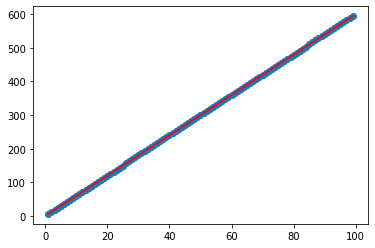

In [7]:
# Minimizing a quadratic function
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def SSE(m, data):
    totalError = 0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if (math.isnan(data.iloc[i, 0])):
            totalNan += 1
        else:
            yOutput = m * data.iloc[i, 0]
            y = data.iloc[i, 1]
            error = (y - yOutput) ** 2
            totalError = totalError + error

    return totalError


def gradient_descent_step(m, data):
    n_points = data.shape[0]  # size of data


    m_grad = 0
    b_grad = 0
    stepper = 0.0003  # this is the learning rate
    for i in range(n_points):
        # Get current pair (x,y)
        x = data.iloc[i, 0]
        y = data.iloc[i, 1]
        if (math.isnan(x) | math.isnan(y)):  # it will prevent for crashing when some data is missing
            # print("is nan")
            continue
        # you will calculate the partical derivative for each value in data

        # Partial derivative respect 'm'
        dm = -((2 / n_points) * x * (y - (m * x )))



        # Update gradient
        m_grad = m_grad + dm

        # Set the new 'better' updated 'm' and 'b'
        m_updated = m - stepper * m_grad

    return m_updated


X = np.arange(1,100)
y = 6 * X 
data = pd.DataFrame(data={'x': X, 'y': y})

m = 8
sse = SSE(m,data)
print('For the fitting line: y = %sx \nSSE: %.2f' %(m,sse))

print('Starting line: y = %.2fx - Error: %.2f' % (m, sse))

for i in range(1000):
    m = gradient_descent_step(m,  data)
    sse = SSE(m, data)
    if i%100==0:
        print('At step %d - Line: y = %.3fx  - Error: %.2f' %(i+1,m,sse))

print('\nBest line: y = %.2fx  - Error: %.2f' % (m, sse))
plt.scatter(X, y)
plt.plot(X, m * X, color='red')
plt.show()

## Gradiente 2 valores

For the fitting line: y = 5x + 3
SSE: 308946.00
Starting line: y = 5.00x + 3.00 - Error: 308946.00
At step 1 - Line: y = 6.930x + 3.029 - Error: 303076.56
At step 101 - Line: y = 6.338x + 2.990 - Error: 44571.76
At step 201 - Line: y = 6.111x + 2.958 - Error: 6622.07
At step 301 - Line: y = 6.025x + 2.928 - Error: 1048.92
At step 401 - Line: y = 5.992x + 2.899 - Error: 228.57
At step 501 - Line: y = 5.980x + 2.871 - Error: 105.98
At step 601 - Line: y = 5.975x + 2.844 - Error: 85.87
At step 701 - Line: y = 5.974x + 2.816 - Error: 80.88
At step 801 - Line: y = 5.973x + 2.790 - Error: 78.15
At step 901 - Line: y = 5.974x + 2.764 - Error: 75.83
At step 1001 - Line: y = 5.974x + 2.738 - Error: 73.61
At step 1101 - Line: y = 5.974x + 2.712 - Error: 71.47
At step 1201 - Line: y = 5.975x + 2.687 - Error: 69.39
At step 1301 - Line: y = 5.975x + 2.662 - Error: 67.37
At step 1401 - Line: y = 5.975x + 2.638 - Error: 65.40
At step 1501 - Line: y = 5.976x + 2.614 - Error: 63.50
At step 1601 - Line:

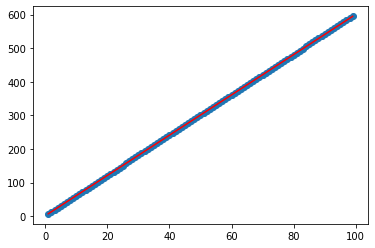

In [8]:
# Minimizing a quadratic function
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def SSE(m, b, data):
    totalError = 0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if (math.isnan(data.iloc[i, 0])):
            totalNan += 1
        else:
            yOutput = m * data.iloc[i, 0] + b
            y = data.iloc[i, 1]
            error = (y - yOutput) ** 2
            totalError = totalError + error

    return totalError


def gradient_descent_step(m, b, data):
    n_points = data.shape[0]  # size of data


    m_grad = 0
    b_grad = 0
    stepper = 0.0003  # this is the learning rate
    for i in range(n_points):
        # Get current pair (x,y)
        x = data.iloc[i, 0]
        y = data.iloc[i, 1]
        if (math.isnan(x) | math.isnan(y)):  # it will prevent for crashing when some data is missing
            # print("is nan")
            continue
        # you will calculate the partical derivative for each value in data

        # Partial derivative respect 'm'
        dm = -((2 / n_points) * x * (y - (m * x + b)))

        # Partial derivative respect 'b'
        db = -((2 / n_points) * (y - (m * x + b)))

        # Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
        # Set the new 'better' updated 'm' and 'b'
        m_updated = m - stepper * m_grad
        b_updated = b - stepper * b_grad
    return m_updated, b_updated


X = np.arange(1,100)
y = 6 * X + 1
data = pd.DataFrame(data={'x': X, 'y': y})

m = 5
b = 3
sse = SSE(m,b,data)
print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

print('Starting line: y = %.2fx + %.2f - Error: %.2f' % (m, b, sse))

for i in range(10000):
    m, b = gradient_descent_step(m, b, data)
    sse = SSE(m, b, data)
    if i%100==0:
        print('At step %d - Line: y = %.3fx + %.3f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest line: y = %.2fx + %.2f - Error: %.2f' % (m, b, sse))
plt.scatter(X, y)
plt.plot(X, m * X + b, color='red')
plt.show()